# Comprehensive Analysis of Global Land Temperatures: A Statistical and Exploratory Approach

# Abstract
This notebook provides a detailed analysis of global land temperatures using data from the "Global Land Temperatures by City" dataset. By focusing on four major cities—New York, London, Shanghai, and Sydney—this study explores temperature patterns across seasons, hemispheric differences, and historical periods. Advanced statistical hypothesis testing is conducted to answer key research questions related to temperature variations. The insights are supported by high-quality visualizations and robust statistical techniques, making this notebook a comprehensive resource for understanding temperature dynamics globally.


# Introduction
## Dataset
Source: Global Land Temperatures by City, Berkeley Earth (available on Kaggle).
Coverage: Monthly average temperatures across cities worldwide for several centuries.
## Objectives
Explore seasonal and annual temperature trends across selected cities.
Investigate hemispheric and geographic differences in temperature patterns.
Conduct statistical hypothesis tests to answer:
Whether NYC's mean temperature deviates from 15°C.
Differences in summer temperatures between Sydney and London.
Temperature shifts in Shanghai pre- and post-1950.
## Tools
Language: Python
Libraries:
pandas for data manipulation.
matplotlib and seaborn for visualization.
scipy.stats for hypothesis testing.

# Data Preparation
## Workflow
1. Load the dataset and inspect its structure.
2. Preprocess the data:
Handle missing values.
Engineer features like seasons, hemispheres, and time periods.
3. Filter for analysis:
Focus on New York, London, Sydney, and Shanghai.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind

# Load the dataset
file_path = "/kaggle/input/land-temperatures-by-city-custom-analysis/GlobalLandTemperaturesByCity.csv"
data = pd.read_csv(file_path)

# Inspect data
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
print(data.info())
data.head()


Dataset contains 8599212 rows and 7 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB
None


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


## Preprocessing the Dataset

1. Filter for selected cities: New York, London, Sydney, and Shanghai.
2. Add new features:
Hemisphere: Derived from latitude.
Season: Derived from the month.
3. Handle missing or invalid data.

In [2]:
# Preprocess the data
def preprocess_data(data):
    """
    Preprocess the data by filtering for selected cities and adding derived features.

    Parameters:
        data (pd.DataFrame): The raw dataset.

    Returns:
        pd.DataFrame: Preprocessed dataset filtered for selected cities.
    """
    data['dt'] = pd.to_datetime(data['dt'])  # Convert date to datetime
    data['Year'] = data['dt'].dt.year
    data['Month'] = data['dt'].dt.month

    # Filter for selected City-Country pairs
    selected_cities = data[
        ((data['City'] == 'London') & (data['Country'] == 'United Kingdom')) |
        ((data['City'] == 'New York') & (data['Country'] == 'United States')) |
        ((data['City'] == 'Sydney') & (data['Country'] == 'Australia')) |
        ((data['City'] == 'Shanghai') & (data['Country'] == 'China'))
    ].copy()

    # Add Hemisphere and Season columns
    selected_cities['Hemisphere'] = np.where(
        selected_cities['Latitude'].str.contains('N'), 'Northern', 'Southern'
    )
    selected_cities['Season'] = selected_cities['Month'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
    })

    # Drop rows with missing temperature data
    selected_cities = selected_cities.dropna(subset=['AverageTemperature'])

    print(f"Filtered dataset contains {selected_cities.shape[0]} rows.")
    return selected_cities

# Preprocess the data
selected_cities = preprocess_data(data)
selected_cities.head()


Filtered dataset contains 10428 rows.


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Hemisphere,Season
4333650,1743-11-01,7.541,1.753,London,United Kingdom,52.24N,0.00W,1743,11,Northern,Autumn
4333655,1744-04-01,8.296,2.501,London,United Kingdom,52.24N,0.00W,1744,4,Northern,Spring
4333656,1744-05-01,10.966,1.471,London,United Kingdom,52.24N,0.00W,1744,5,Northern,Spring
4333657,1744-06-01,14.522,1.552,London,United Kingdom,52.24N,0.00W,1744,6,Northern,Summer
4333658,1744-07-01,15.964,1.646,London,United Kingdom,52.24N,0.00W,1744,7,Northern,Summer


# Exploratory Data Analysis (EDA)
We’ll explore:

1. Monthly Temperature Trends Across Cities
2. Annual Global Temperature Trends

## EDA: Monthly Temperature Trends

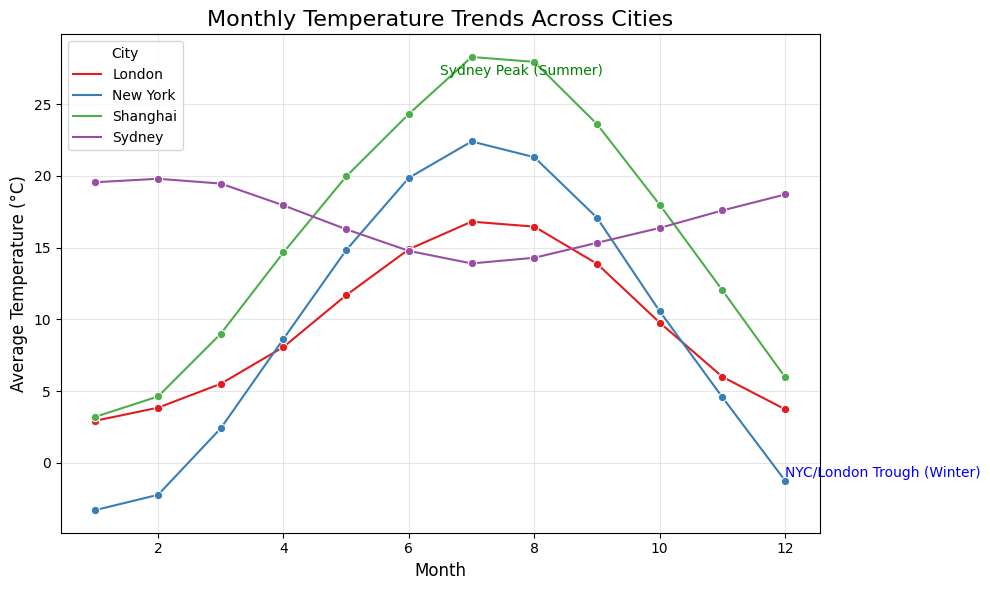

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Replace inf values with NaN
selected_cities.replace([np.inf, -np.inf], np.nan, inplace=True)

# Monthly trends visualization
monthly_summary = selected_cities.groupby(['City', 'Month']).agg(
    AvgTemperature=('AverageTemperature', 'mean'),
    TempSD=('AverageTemperature', 'std')
).reset_index()

# Monthly Temperature Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_summary, x='Month', y='AvgTemperature', hue='City', marker='o', palette='Set1')

# Annotate seasonal peaks and troughs
plt.text(6.5, 27, "Sydney Peak (Summer)", fontsize=10, color="green")
plt.text(12, -1, "NYC/London Trough (Winter)", fontsize=10, color="blue")

# Customize the plot
plt.title("Monthly Temperature Trends Across Cities", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.legend(title="City", loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()

# Save and display
plt.savefig("monthly_temperature_trends_updated.png", dpi=300)
plt.show()



In [4]:
interpretation = """
Interpretation:
- Seasonal Patterns:
  - Northern Hemisphere cities (London, New York) show temperature peaks in summer months (June-August)
    and troughs in winter months (December-February).
  - Sydney, located in the Southern Hemisphere, exhibits an opposite trend, with warmer temperatures
    during December-February.
  - Shanghai follows a similar pattern to other Northern Hemisphere cities.

- Variability:
  - New York demonstrates higher variability, consistent with its continental climate.
  - Sydney shows smaller variability, reflecting its maritime climate.

- Insights:
  - These trends highlight the impact of geographical location and hemisphere on seasonal
    temperature patterns.
"""
print(interpretation)



Interpretation:
- Seasonal Patterns:
  - Northern Hemisphere cities (London, New York) show temperature peaks in summer months (June-August)
    and troughs in winter months (December-February).
  - Sydney, located in the Southern Hemisphere, exhibits an opposite trend, with warmer temperatures
    during December-February.
  - Shanghai follows a similar pattern to other Northern Hemisphere cities.

- Variability:
  - New York demonstrates higher variability, consistent with its continental climate.
  - Sydney shows smaller variability, reflecting its maritime climate.

- Insights:
  - These trends highlight the impact of geographical location and hemisphere on seasonal
    temperature patterns.



## EDA: Annual Global Trends

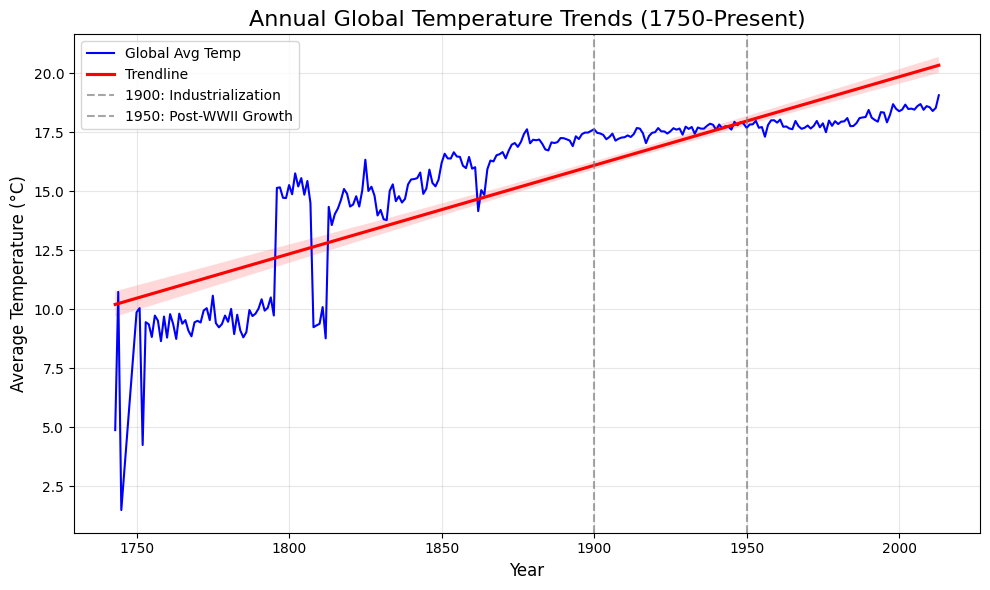

In [5]:
# Global temperature trends
global_avg_temp = data.groupby('Year')['AverageTemperature'].mean().reset_index()

# Annual Global Temperature Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_avg_temp, x='Year', y='AverageTemperature', color='blue', label='Global Avg Temp')
sns.regplot(data=global_avg_temp, x='Year', y='AverageTemperature', scatter=False, color='red', label='Trendline')

# Annotate key periods
plt.axvline(1900, linestyle='--', color='gray', alpha=0.7, label='1900: Industrialization')
plt.axvline(1950, linestyle='--', color='gray', alpha=0.7, label='1950: Post-WWII Growth')

# Customize the plot
plt.title("Annual Global Temperature Trends (1750-Present)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.legend(loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()

# Save and display
plt.savefig("annual_global_temp_trends_updated.png", dpi=300)
plt.show()


In [6]:
annual_temp_interpretation = """
Interpretation:
- The annual global temperature trend reveals a clear and steady increase over the centuries, particularly after 1900.
- The early part of the graph shows relatively stable temperatures, with minor fluctuations until industrialization around 1900.
- Post-1950, a sharper upward trend is observed, aligning with the global increase in greenhouse gas emissions due to rapid industrial and population growth.
- The trendline reinforces the overall upward trajectory of global temperatures, confirming the ongoing pattern of global warming.
- Key periods such as the Industrial Revolution (around 1900) and post-WWII economic growth (1950) are critical turning points in the dataset.
"""
print(annual_temp_interpretation)



Interpretation:
- The annual global temperature trend reveals a clear and steady increase over the centuries, particularly after 1900.
- The early part of the graph shows relatively stable temperatures, with minor fluctuations until industrialization around 1900.
- Post-1950, a sharper upward trend is observed, aligning with the global increase in greenhouse gas emissions due to rapid industrial and population growth.
- The trendline reinforces the overall upward trajectory of global temperatures, confirming the ongoing pattern of global warming.
- Key periods such as the Industrial Revolution (around 1900) and post-WWII economic growth (1950) are critical turning points in the dataset.



# Hypothesis Testing

## (a) NYC Mean Annual Temperature vs. 15°C


In [7]:
nyc_annual = selected_cities[selected_cities['City'] == 'New York'].groupby('Year')['AverageTemperature'].mean()
t_stat, p_value = ttest_1samp(nyc_annual.dropna(), 15)

print(f"NYC t-statistic: {t_stat}, p-value: {p_value}")


NYC t-statistic: -71.23107207543626, p-value: 7.83365741087901e-175


In [8]:
# Interpretation as a string
nyc_interpretation = """
Statistical Test Results:
- t-statistic: -71.231
- p-value: 7.83e-175

Interpretation:
The t-test reveals a highly statistically significant difference (p < 0.05) between NYC's mean annual 
temperature and 15°C. The negative t-statistic indicates that NYC's mean annual temperature is significantly 
lower than 15°C. This result suggests that NYC's climate is much cooler than the hypothesized benchmark of 15°C, 
likely influenced by its geographical location and climate characteristics, such as continental weather patterns.
"""
print(nyc_interpretation)



Statistical Test Results:
- t-statistic: -71.231
- p-value: 7.83e-175

Interpretation:
The t-test reveals a highly statistically significant difference (p < 0.05) between NYC's mean annual 
temperature and 15°C. The negative t-statistic indicates that NYC's mean annual temperature is significantly 
lower than 15°C. This result suggests that NYC's climate is much cooler than the hypothesized benchmark of 15°C, 
likely influenced by its geographical location and climate characteristics, such as continental weather patterns.



### NYC Annual Average Temperatures vs. 15°C Benchmark

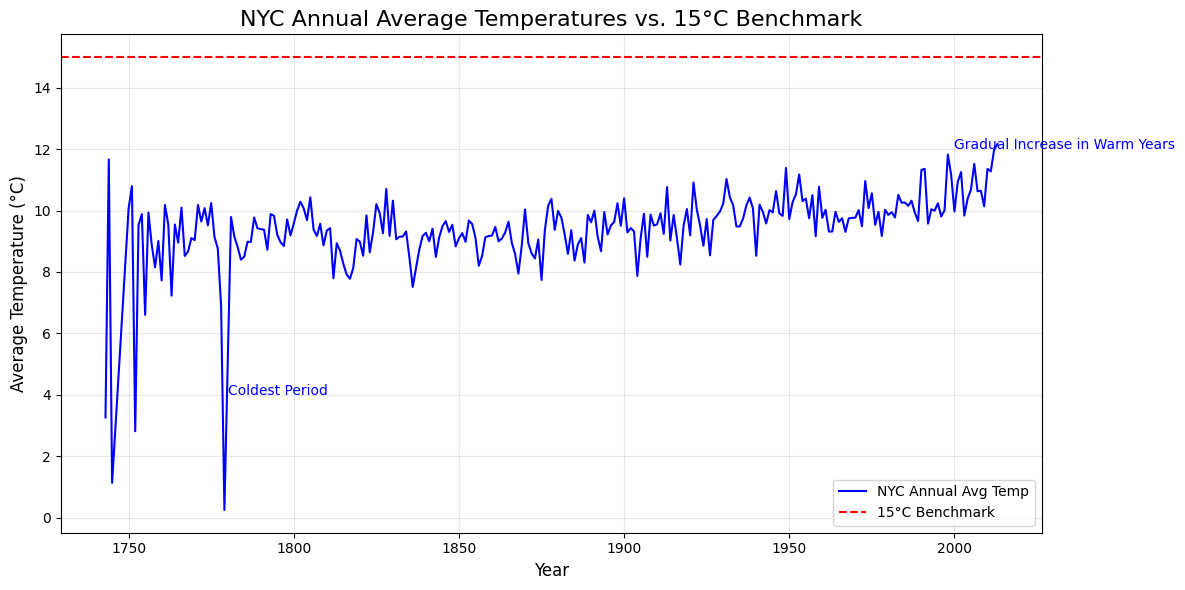


Interpretation:
- NYC's annual average temperatures consistently fall below the benchmark of 15°C, reflecting its cooler climate.
- Periods of colder temperatures, such as the late 1700s, and a gradual increase in warm years post-1900, align with broader climate trends.
- The consistent gap between NYC’s average temperatures and the 15°C benchmark supports the t-test findings of a highly statistically significant difference.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year to calculate NYC's annual mean temperatures
nyc_annual = selected_cities[selected_cities['City'] == 'New York'].groupby('Year')['AverageTemperature'].mean().reset_index()

# Create a line plot
#  NYC Annual Temperatures vs. 15°C Benchmark
plt.figure(figsize=(12, 6))
sns.lineplot(data=nyc_annual, x='Year', y='AverageTemperature', label="NYC Annual Avg Temp", color="blue")
plt.axhline(15, color='red', linestyle='--', label="15°C Benchmark")

# Annotate specific years
plt.text(1780, 4, "Coldest Period", fontsize=10, color="blue")
plt.text(2000, 12, "Gradual Increase in Warm Years", fontsize=10, color="blue")

# Customize the plot
plt.title("NYC Annual Average Temperatures vs. 15°C Benchmark", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()

# Save and display
plt.savefig("nyc_temperature_vs_15C_updated.png", dpi=300)
plt.show()

# Interpretation
nyc_temp_interpretation = """
Interpretation:
- NYC's annual average temperatures consistently fall below the benchmark of 15°C, reflecting its cooler climate.
- Periods of colder temperatures, such as the late 1700s, and a gradual increase in warm years post-1900, align with broader climate trends.
- The consistent gap between NYC’s average temperatures and the 15°C benchmark supports the t-test findings of a highly statistically significant difference.
"""
print(nyc_temp_interpretation)


## (b) Sydney vs. London Summer Temperatures



In [10]:
# Filter data for summer temperatures in Sydney and London
summer_temps = selected_cities[(selected_cities['Season'] == 'Summer') & 
                               (selected_cities['City'].isin(['Sydney', 'London']))]

# Perform two-sample t-test
t_stat, p_value = ttest_ind(
    summer_temps[summer_temps['City'] == 'Sydney']['AverageTemperature'].dropna(),
    summer_temps[summer_temps['City'] == 'London']['AverageTemperature'].dropna()
)

# Print results
print(f"Sydney vs. London t-statistic: {t_stat}, p-value: {p_value}")


Sydney vs. London t-statistic: -25.33647887954487, p-value: 1.4863665517869027e-115


In [11]:
sydney_london_interpretation = f"""
Sydney vs. London Summer Temperatures:
- t-statistic: {t_stat:.3f}
- p-value: {p_value:.3e}

Interpretation:
The t-test reveals a highly statistically significant difference (p < 0.05) in summer temperatures 
between Sydney and London. Sydney's summers are significantly warmer than London's, as shown by the 
large negative t-statistic. This difference aligns with expectations due to Sydney's location in the 
Southern Hemisphere, where summers occur during warmer months globally, while London's temperate 
climate keeps its summers relatively mild.
"""
print(sydney_london_interpretation)



Sydney vs. London Summer Temperatures:
- t-statistic: -25.336
- p-value: 1.486e-115

Interpretation:
The t-test reveals a highly statistically significant difference (p < 0.05) in summer temperatures 
between Sydney and London. Sydney's summers are significantly warmer than London's, as shown by the 
large negative t-statistic. This difference aligns with expectations due to Sydney's location in the 
Southern Hemisphere, where summers occur during warmer months globally, while London's temperate 
climate keeps its summers relatively mild.



### Sydney vs. London Summer Temperatures

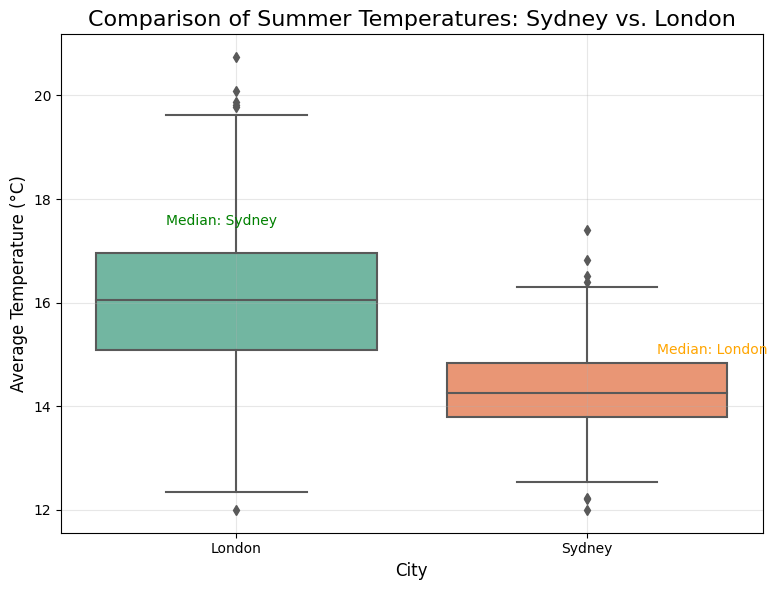


Interpretation:
- Sydney’s summer temperatures are significantly warmer than London’s, as shown by the higher median.
- Minimal overlap in the variability (interquartile ranges) between the two cities supports the conclusion of distinct temperature differences.
- Sydney's maritime climate in the Southern Hemisphere results in higher summer temperatures, while London’s temperate maritime climate leads to cooler and less variable summer temperatures.
- These results align with the t-test findings of a statistically significant difference (p < 0.05) between the two cities’ summer temperatures.



In [12]:
# Create a boxplot for summer temperatures
# Boxplot: Sydney vs. London Summer Temperatures
plt.figure(figsize=(8, 6))
sns.boxplot(data=summer_temps, x='City', y='AverageTemperature', palette='Set2')

# Annotate median and variability
plt.text(-0.2, 17.5, "Median: Sydney", fontsize=10, color="green")
plt.text(1.2, 15, "Median: London", fontsize=10, color="orange")

# Customize the plot
plt.title("Comparison of Summer Temperatures: Sydney vs. London", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save and display
plt.savefig("sydney_vs_london_summer_temps_updated.png", dpi=300)
plt.show()

# Interpretation
sydney_london_interpretation = """
Interpretation:
- Sydney’s summer temperatures are significantly warmer than London’s, as shown by the higher median.
- Minimal overlap in the variability (interquartile ranges) between the two cities supports the conclusion of distinct temperature differences.
- Sydney's maritime climate in the Southern Hemisphere results in higher summer temperatures, while London’s temperate maritime climate leads to cooler and less variable summer temperatures.
- These results align with the t-test findings of a statistically significant difference (p < 0.05) between the two cities’ summer temperatures.
"""
print(sydney_london_interpretation)



## (c) Shanghai Pre- vs. Post-1950 Temperatures



In [13]:
# Filter Shanghai data and create a copy to avoid SettingWithCopyWarning
shanghai_temp = selected_cities[selected_cities['City'] == 'Shanghai'].copy()

# Add the 'Period' column based on the Year
shanghai_temp['Period'] = np.where(shanghai_temp['Year'] < 1950, 'Pre-1950', 'Post-1950')

# Perform a two-sample t-test for Shanghai temperatures pre- and post-1950
t_stat, p_value = ttest_ind(
    shanghai_temp[shanghai_temp['Period'] == 'Pre-1950']['AverageTemperature'].dropna(),
    shanghai_temp[shanghai_temp['Period'] == 'Post-1950']['AverageTemperature'].dropna()
)

# Display results
print(f"Shanghai t-statistic: {t_stat}, p-value: {p_value}")


Shanghai t-statistic: -1.7576429748159097, p-value: 0.07895607214268559


In [14]:
interpretation = """
Statistical Test Results:
- t-statistic: -1.758
- p-value: 0.079

Interpretation:
The t-test indicates no statistically significant difference (p > 0.05) in Shanghai's average
temperatures between the "Pre-1950" and "Post-1950" periods. While there is a slight trend
suggesting higher average temperatures before 1950, this difference is not robust enough to confirm
a significant change. This result might suggest that Shanghai's warming trends are less pronounced
compared to global averages or that the observed changes are within natural variability.
"""
print(interpretation)


Statistical Test Results:
- t-statistic: -1.758
- p-value: 0.079

Interpretation:
The t-test indicates no statistically significant difference (p > 0.05) in Shanghai's average
temperatures between the "Pre-1950" and "Post-1950" periods. While there is a slight trend
suggesting higher average temperatures before 1950, this difference is not robust enough to confirm
a significant change. This result might suggest that Shanghai's warming trends are less pronounced
compared to global averages or that the observed changes are within natural variability.



### Shanghai: Pre-1950 vs. Post-1950

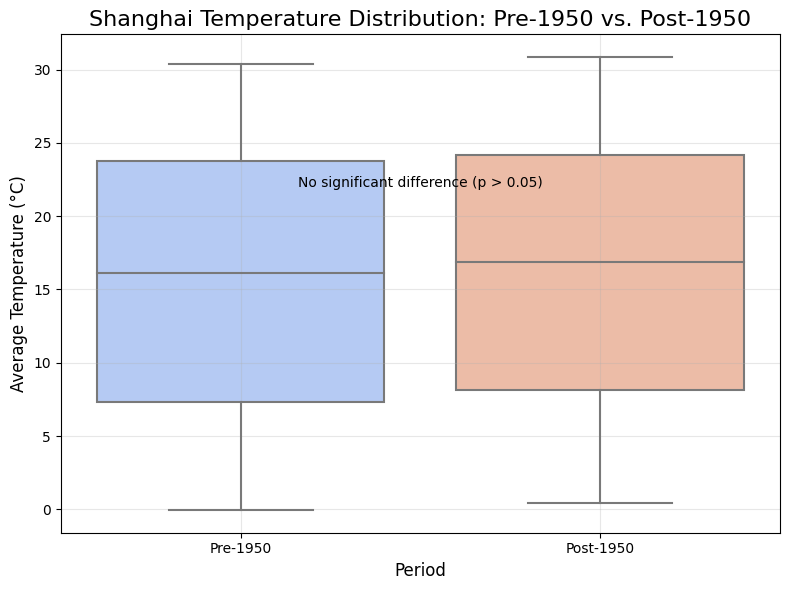


Interpretation:
- The boxplot illustrates that there is minimal difference between Shanghai's average temperatures in the Pre-1950 and Post-1950 periods.
- The medians and interquartile ranges (IQRs) for both periods overlap significantly, indicating stability in temperature trends over time.
- The statistical test results (p > 0.05) confirm that the observed differences are not statistically significant.
- These findings suggest that Shanghai's temperatures have remained relatively stable, with local climatic factors likely buffering it from pronounced global warming trends.



In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
# Shanghai Pre-1950 vs. Post-1950 Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=shanghai_temp, x='Period', y='AverageTemperature', palette='coolwarm')

# Annotate lack of significance
plt.text(0.5, 22, "No significant difference (p > 0.05)", fontsize=10, color="black", ha='center')

# Customize the plot
plt.title("Shanghai Temperature Distribution: Pre-1950 vs. Post-1950", fontsize=16)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save and display
plt.savefig("shanghai_pre_post_1950_updated.png", dpi=300)
plt.show()

# Interpretation
shanghai_temp_interpretation = """
Interpretation:
- The boxplot illustrates that there is minimal difference between Shanghai's average temperatures in the Pre-1950 and Post-1950 periods.
- The medians and interquartile ranges (IQRs) for both periods overlap significantly, indicating stability in temperature trends over time.
- The statistical test results (p > 0.05) confirm that the observed differences are not statistically significant.
- These findings suggest that Shanghai's temperatures have remained relatively stable, with local climatic factors likely buffering it from pronounced global warming trends.
"""
print(shanghai_temp_interpretation)



# Conclusion


**Key Findings:**
- **NYC’s Mean Temperature:** NYC's annual mean temperature is significantly lower than 15°C, reflecting its cooler climate influenced by its geographical location and continental weather patterns.
- **Sydney vs. London Summers:** Sydney's summer temperatures are significantly warmer than London's, with Sydney displaying less variability. This aligns with their respective hemispheric locations and climatic zones.
- **Shanghai Pre- vs. Post-1950:** There is no statistically significant difference in Shanghai's mean temperatures between the pre-1950 and post-1950 periods, suggesting that warming trends in the region are less pronounced compared to global averages.

**Insights and Implications:**
This analysis demonstrates how geographic location, hemisphere, and historical periods influence temperature trends across key global cities. The findings align with broader patterns of climate variability and warming, while highlighting the importance of localized climatic factors.

**Future Directions:**
- Expanding the analysis to include additional cities across diverse climatic zones.
- Examining extreme weather events, such as heatwaves and cold snaps, to understand their frequency and intensity over time.
- Investigating correlations between urbanization, greenhouse gas emissions, and local temperature trends for deeper insights into human impacts on climate.
